In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv("steam_games.csv")

In [35]:
df.describe(include= 'all')

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
count,24064,28852,32133,30085,32135,30068,31972,225.000000,32133,31465,30750.000000,32135,3.213300e+04,28836,24953,2607.000000
unique,8236,883,32094,30054,32135,3582,15395,NaN,32132,4649,NaN,2,NaN,10992,18,NaN
top,Ubisoft,['Action'],Soundtrack,Soundtrack,http://store.steampowered.com/app/761140/Lost_...,2012-10-16,"['Casual', 'Simulation']",NaN,http://steamcommunity.com/app/612880/reviews/?...,['Single-player'],NaN,False,NaN,Ubisoft - San Francisco,Mixed,NaN
freq,385,1880,3,3,1,100,1292,NaN,2,2794,NaN,30188,NaN,1259,4103,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.930533,NaN,NaN,8.899991,NaN,4.517574e+05,NaN,NaN,72.255466
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.492643,NaN,NaN,16.342327,NaN,1.827140e+05,NaN,NaN,10.833525
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490000,NaN,NaN,0.000000,NaN,1.000000e+01,NaN,NaN,20.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.390000,NaN,NaN,2.990000,NaN,3.292800e+05,NaN,NaN,66.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190000,NaN,NaN,4.990000,NaN,4.520600e+05,NaN,NaN,74.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.660000,NaN,NaN,9.990000,NaN,5.934000e+05,NaN,NaN,80.000000


In [59]:
df.dtypes

publisher          object
genres             object
app_name           object
title              object
url                object
release_date       object
tags               object
discount_price    float64
reviews_url        object
specs              object
price             float64
early_access         bool
id                float64
developer          object
sentiment          object
metascore         float64
dtype: object

Veamos cuantos valores faltantes posee cada columna del DataFrame:

In [37]:
nulls = df.isnull().sum()
dict(nulls)

{'publisher': 8071,
 'genres': 3283,
 'app_name': 2,
 'title': 2050,
 'url': 0,
 'release_date': 2067,
 'tags': 163,
 'discount_price': 31910,
 'reviews_url': 2,
 'specs': 670,
 'price': 1385,
 'early_access': 0,
 'id': 2,
 'developer': 3299,
 'sentiment': 7182,
 'metascore': 29528}

Podemos observar que todo los valores faltantes se distribuyen en todo el dataset, exceptuando dos columnas: *"url"* y *"early_access"*. Luego tenemos columnas con muchos más valores faltantes que datos válidos, como: *"metascore"* o *"discount_price"*.

Visualicemos, a continuación, como se distribuyen los valores faltantes en función de su posición en el set con el siguiente gráfico:

<Axes: >

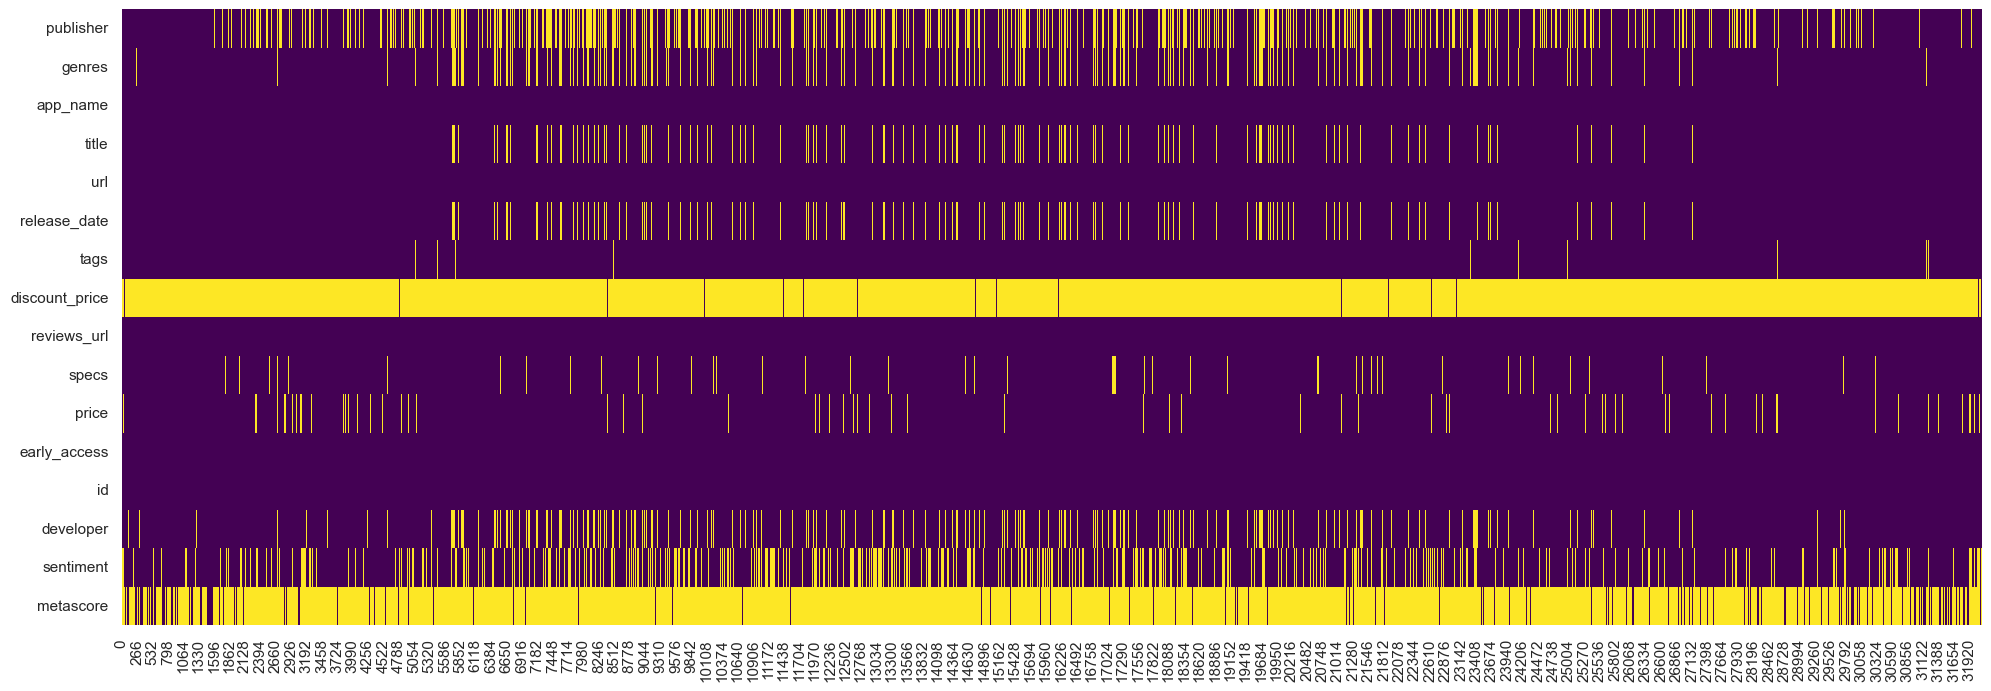

In [56]:
plt.figure(figsize= (24,8))
sns.heatmap(df.isnull().astype(int).T, cmap= 'viridis', cbar= False)

Podemos observar que los valores no tienen ninguna condición que provoque la presencia de valores nulos.

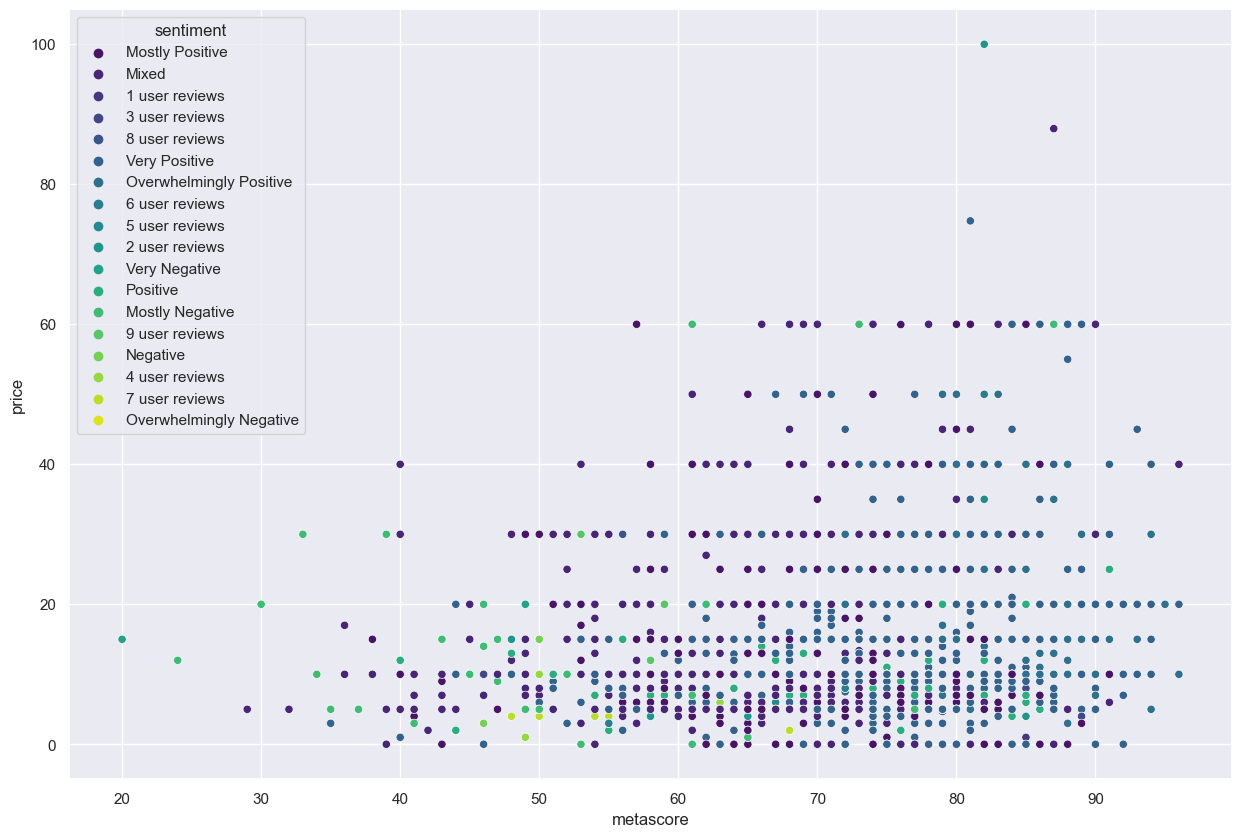

In [76]:
plt.figure(figsize=(15,10))
sns.scatterplot(x= df['metascore'],y= df['price'], hue= df['sentiment'], palette= 'viridis');